# Datenbeschreibung und Analyse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from IPython.display import display, HTML
#display(HTML("<style>div.output_scroll { height: 180em; }</style>"))

In [2]:
# extra code – code to save the figures as high-res PNGs 

from pathlib import Path # order os

IMAGES_PATH = Path() / "images" #constant
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Beschreibung der Daten 

Datenquelle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/
Um die Dateien herunterzuladen, ist eine Registrierung bei Kaggle erforderlich.
Zipped Datein ist 72,0 KB. Exaktierted as Excel ist 312 KB.

## Daten-Ladung

In [3]:
#data loading

pd_data=pd.read_csv('healthcare-dataset-stroke-data.csv',sep=',')

In [4]:
pd_data.head(5)# esrste 5 Zeile

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Daten-Übersicht

In [5]:
pd_data.columns#Spalte Name

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
len(pd_data.columns)#Spalte Anzale

12

In [7]:
len(pd_data)#Zeile Anzale

5110

Es gibt 5110 Zeile und 12 Spalten, und zwar'id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke'

In [8]:
pd_data.describe()#Datenkennzahlen(kurz)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


bedenkliche Daten:
      
      Age: Überwiegend Integer, vereinzelt Float (min=0.08)
      bmi: 10.300000--97.6000

Daten darüber, wer den höchsten BMI hat:

In [9]:
pd_data.loc[pd_data.loc[:,'bmi']==pd_data.loc[:,'bmi'].max(),:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


Daten darüber, wer die Jüngsten sind:

In [10]:
pd_data.loc[pd_data.loc[:,'age']==pd_data.loc[:,'age'].min(),:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [11]:
pd_data["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [12]:
len(pd_data.loc[pd_data.loc[:,'smoking_status']=='Unknown',:])

1544

In [13]:
pd.isna(pd_data).sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In ‘bmi’ gibt es 201 nan Werte.

In [14]:
pd_data.dtypes#datatyoe

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Histogramme¶

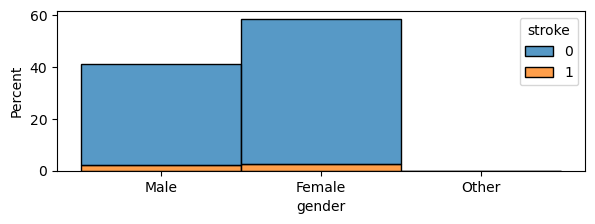

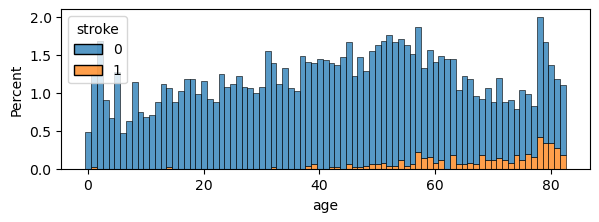

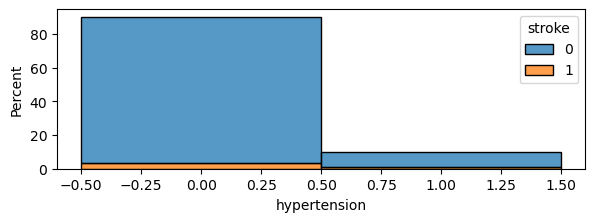

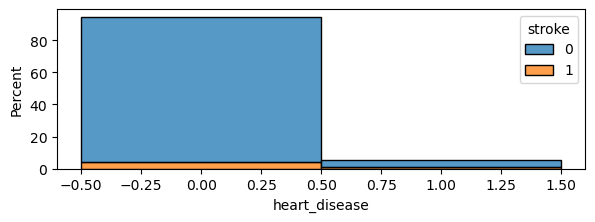

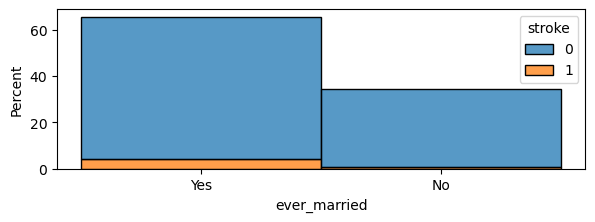

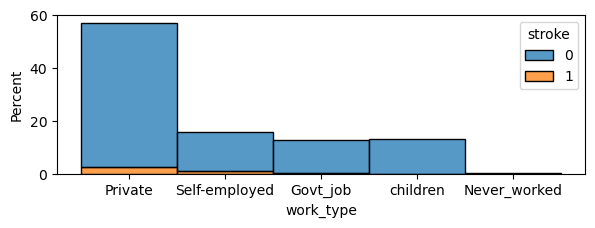

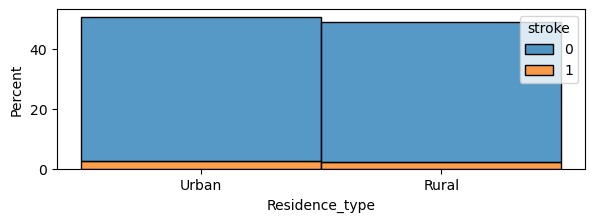

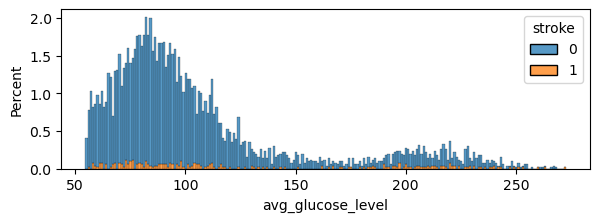

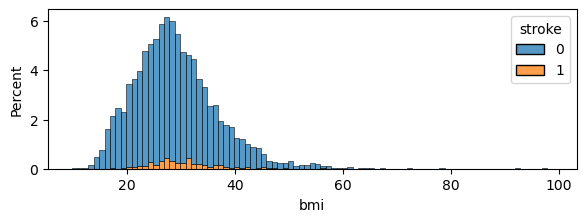

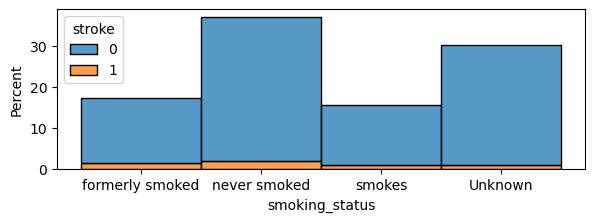

In [15]:
import seaborn as sns

pd_data.loc[:,['hypertension', 'heart_disease']]=pd_data.loc[:,['hypertension', 'heart_disease']].astype('category',copy=True)
n=0
for i in ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']:
    n+=1
    plt.figure(figsize=(15,12))
    plt.subplot(5,2,n)
    sns.histplot(pd_data,x=i,hue="stroke",multiple='stack',stat='percent',discrete=True)
    #save_fig(f"histogram_plots_{i}")

plt.show()

Die folgenden Beobachtungen können gemacht werden:

	Die meisten Menschen haben keinen Bluthochdruck.
	Die meisten Menschen haben keine Herzkrankheiten.
	Die meisten Menschen haben einen durchschnittlichen Blutzuckerspiegel von weniger als 180.
	Fast alle Menschen haben einen BMI von weniger als 60.
	Die meisten Menschen haben keinen Schlaganfall erlitten.


## Korrelationen zwischen einzelnen Spalten

Korrelationsberechnung:

In [16]:
corr_matrix = pd_data.corr(numeric_only = True)
corr_matrix

,id,age,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.001092,0.238171,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.131945,0.042374,1.000000


Die Features, die das Ergebnis am ehesten beeinflussen:

In [17]:
abs(corr_matrix['stroke']).sort_values(ascending=False)

stroke               1.000000
age                  0.245257
avg_glucose_level    0.131945
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

Beziehungen zwischen 2 Spalten auf grafischem Weg ermitteln:

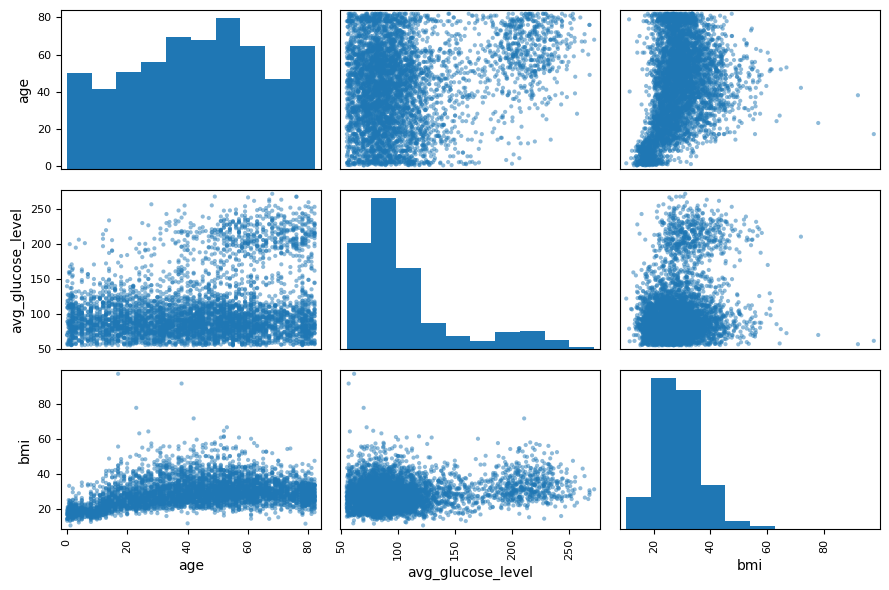

In [18]:
from pandas.plotting import scatter_matrix

attributes = ['age','avg_glucose_level','bmi']
scatter_matrix(pd_data[attributes], figsize=(9, 6))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

C:\Users\alfa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


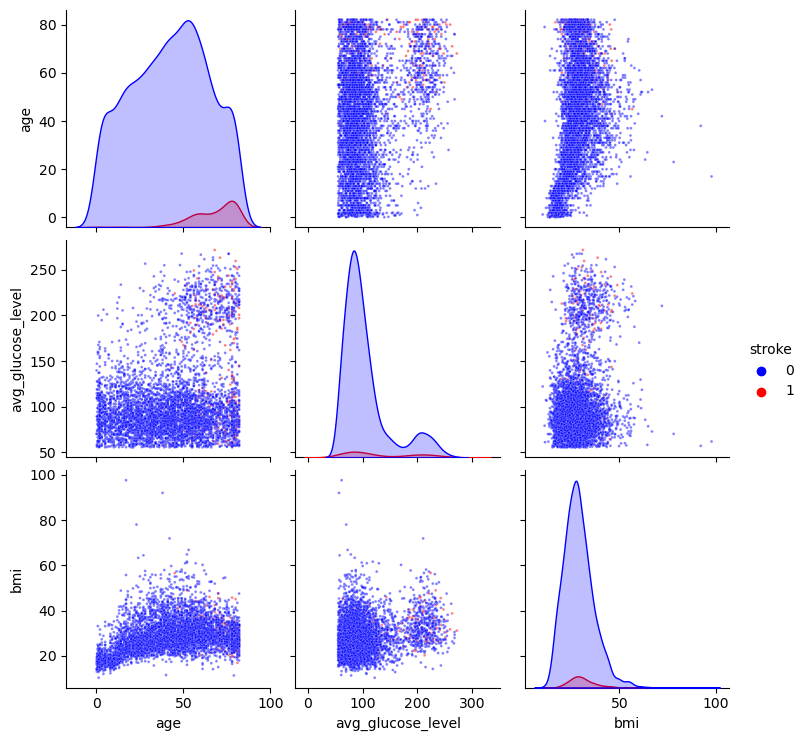

In [19]:
import seaborn as sns

sns.pairplot(pd_data, vars=attributes, hue="stroke", palette={0:"b", 1:"r"}, plot_kws=dict(alpha=0.5, s=4.0) ) 


Wir schauen uns an welche kategorischen Daten wie häufig im Datensatz vorkommen

In [20]:
categorial_data = ["gender",
                   "hypertension",
                   "heart_disease",
                   "ever_married",
                   "work_type",
                   "Residence_type",
                   "smoking_status"]

for feature in categorial_data:
    print(pd_data[feature].value_counts(dropna=False))

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Darstellung der Häufigkeiten kategorischer Daten

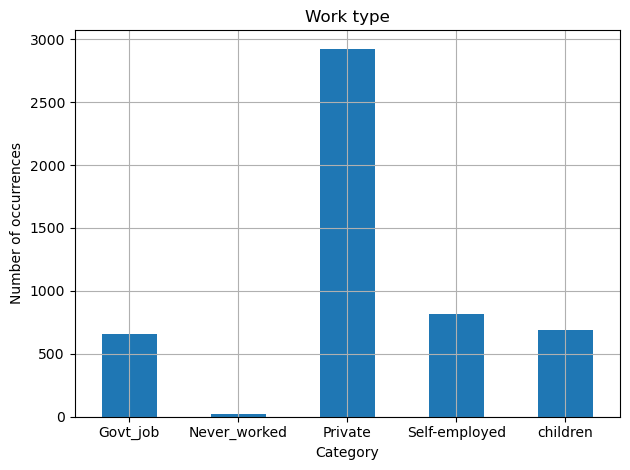

In [26]:
# Wir zeichnen, wieviele Elemente zu jeder Kategorie gehören.
pd_data["work_type"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Category")
plt.ylabel("Number of occurrences")
plt.title("Work type")
save_fig("Number_of_occurences_work_type")  # extra code
plt.show()

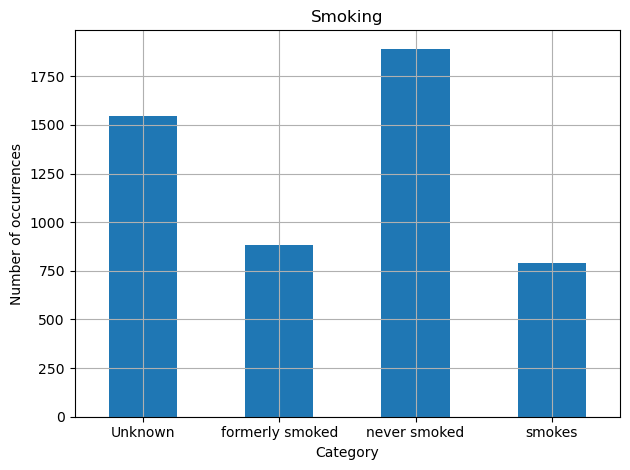

In [22]:
# Wir zeichnen, wieviele Elemente zu jeder Kategorie gehören.
pd_data["smoking_status"].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.xlabel("Category")
plt.ylabel("Number of occurrences")
plt.title("Smoking")
save_fig("Number_of_occurences_smoking")  # extra code
plt.show()

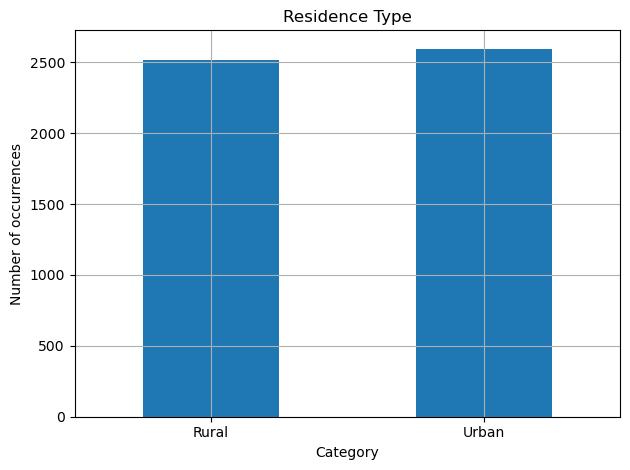

In [23]:
# Wir zeichnen, wieviele Elemente zu jeder Kategorie gehören.
pd_data["Residence_type"].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.xlabel("Category")
plt.ylabel("Number of occurrences")
plt.title("Residence Type")
save_fig("Number_of_occurences_residence")  # extra code
plt.show()

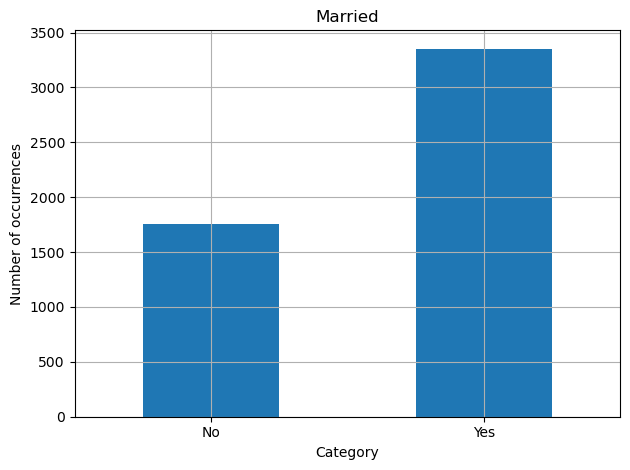

In [24]:
# Wir zeichnen, wieviele Elemente zu jeder Kategorie gehören.
pd_data["ever_married"].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.xlabel("Category")
plt.ylabel("Number of occurrences")
plt.title("Married")
save_fig("Number_of_occurences_married")  # extra code
plt.show()